In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # or the full path to the "project" directory
import numpy as np
import gpbr

In [2]:
def u2de(xp, t):
    if abs(t) < 1e-10:
        return 0
    return xp.x**2 + xp.y**2 + 4*t
    

In [3]:
def du2de(xb, t, rfunc, s):
    if abs(t) < 1e-10:
        return 0
    r_s = rfunc(s)
    nu = (-np.sin(s)/r_s, np.cos(s)/r_s)

    return 2*xb.x*nu[0] + 2*xb.y*nu[1]


In [4]:
T = 2 # final time
N = 9 # N+1=10 time points
# M = 64 # number of collocation points
# M = 16 # number of collocation points
M = 32 # number of collocation points

In [5]:
from gpbr.direct.common.collocation import collocation_points_2d, CollocationData2D
coll_2d = collocation_points_2d(M, startpoint=False)
coll_2d

CollocationData2D(n=32, theta=array([0.19634954, 0.39269908, 0.58904862, 0.78539816, 0.9817477 ,
       1.17809725, 1.37444679, 1.57079633, 1.76714587, 1.96349541,
       2.15984495, 2.35619449, 2.55254403, 2.74889357, 2.94524311,
       3.14159265, 3.33794219, 3.53429174, 3.73064128, 3.92699082,
       4.12334036, 4.3196899 , 4.51603944, 4.71238898, 4.90873852,
       5.10508806, 5.3014376 , 5.49778714, 5.69413668, 5.89048623,
       6.08683577, 6.28318531]))

In [6]:
from gpbr.direct.common.boundary import StarlikeCurve, starlike_circle_base, starlike_curve
point_circle = starlike_circle_base(coll_2d)

Gamma1 = point_circle*0.5
Gamma2 = point_circle*1.5

In [7]:
from gpbr.direct.common.boundary import Point2D
# test_points = [Point2D(0.0, 0.98), Point2D(1.0, -0.73), Point2D(0.51, 0.54), Point2D(-0.501, 0.52), Point2D(-1.11, -0.75), Point2D(0.0, -1.0)]
test_points = [Point2D(1.0, 1.0), Point2D(-1.0, 1.0)]

In [8]:
import matplotlib.pyplot as plt

def plot_boundaries_and_points(G1: StarlikeCurve, G2: StarlikeCurve, test_points, t):
    fig_plot, ax_plot = plt.subplots()
    g1_x, g1_y = G1.raw_points()
    g2_x, g2_y = G2.raw_points()
    ax_plot.plot(g1_x, g1_y, 'b--')
    ax_plot.plot(g2_x, g2_y, 'r--')
    for i, p in enumerate(test_points):
        ax_plot.plot(p.x, p.y, 'go')
        ax_plot.annotate(f'ue_i={u2de(p,t)}', (p.x, p.y), textcoords="offset points", xytext=(15,-5), ha='center')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()

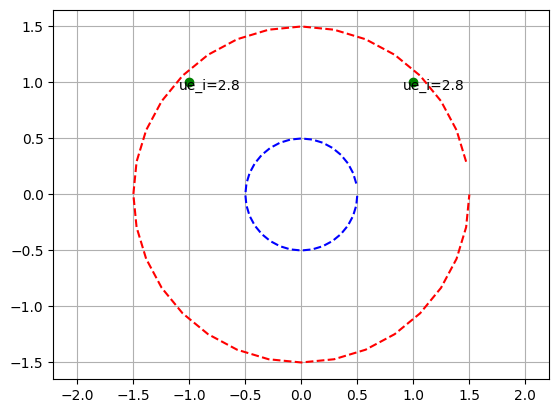

In [9]:
plot_boundaries_and_points(Gamma1, Gamma2, test_points,0.2)

# Approximation

In [10]:
tn = np.array([(n+1)*(T/(N+1)) for n in range(0, N+1)])
h = T/(N+1)

In [11]:
tn

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [12]:
nu = np.sqrt(2/h)
nu

np.float64(3.1622776601683795)

In [13]:
betta_array = []
for n in range(0, N+1):
    sign = (-1)**n
    betta_array.append(sign*(4/h))
betta_array[0] = np.nan
betta_array

[nan, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0]

In [14]:
from gpbr.direct.heat_equation.common import MFSData
mfs_data =MFSData(N, T, tn, M, betta_array, nu)

In [15]:
from gpbr.direct.common.source import SourcePoints2D, source_points_2d
source_coll_2d = collocation_points_2d(M//2, startpoint=False)
source_point_circle = starlike_circle_base(source_coll_2d)
eta1 = 0.5
eta2 = 1.5


Gamma1_source = source_point_circle*0.5
Gamma2_source = source_point_circle*1.5

source_points = source_points_2d(eta1, eta2, Gamma1_source, Gamma2_source)

In [16]:
## Plot
import matplotlib.pyplot as plt
def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, artG1: StarlikeCurve, artG2: StarlikeCurve):
    fig_plot, ax_plot = plt.subplots()
    g1_x, g1_y = G1.raw_points()
    g2_x, g2_y = G2.raw_points()
    art1_x, art1_y = artG1.raw_points()
    art2_x, art2_y = artG2.raw_points()
    ax_plot.plot(g1_x, g1_y, 'b--')
    ax_plot.plot(g2_x, g2_y, 'r--')
    ax_plot.plot(art1_x, art1_y, 'bo')
    ax_plot.plot(art2_x, art2_y, 'ro')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()


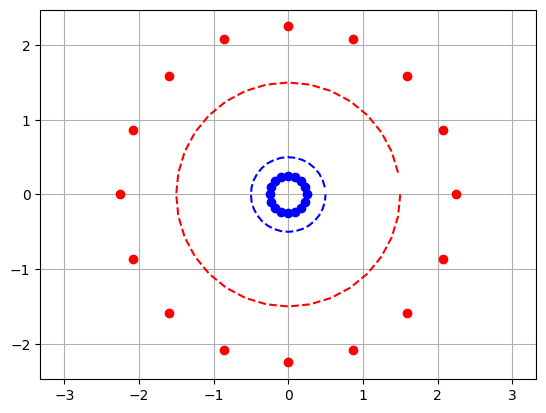

In [17]:
plot_2d(Gamma1, Gamma2, source_points.gart1, source_points.gart2)

In [18]:
from gpbr.direct.heat_equation.polynomial import MFSPolinomials2D, calculate_2d_polinomials

mfs_polynomyals = calculate_2d_polinomials(mfs_data, N)

In [19]:
mfs_polynomyals

MFSPolinomials2D(A=array([[ 1.00000000e+00,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [ 1.00000000e+00,  3.16227766e+00,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [ 1.00000000e+00,  3.16227766e+00,  5.00000000e+00,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [ 1.00000000e+00,  4.21637021e+00,  1.66666667e+00,
         5.27046277e+00,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [ 1.00000000e+00,  4.21637021e+00,  6.66666667e+00,
        -1.87244452e-15,  4.16666667e+00,             nan,
                    nan,             nan,          

In [20]:
from gpbr.direct.heat_equation.fundamental_sequence import fundamental_sequence_2d, FundamentalSequence

fundamental_sequence_gamma1 = fundamental_sequence_2d(Gamma1, source_points, mfs_data, mfs_polynomyals)
fundamental_sequence_gamma2 = fundamental_sequence_2d(Gamma2, source_points, mfs_data, mfs_polynomyals)

In [21]:
from gpbr.direct.common.boundary import Point2D, Point3D
from gpbr.direct.common.distance import point_distance


def f1(x: Point2D | Point3D , t):
    return 0
    # return 0

def f2(x: Point2D | Point3D, t: float) -> np.array:
    return u2de(x, t)
    # return (t**2)*np.exp(-4*t+2)*point_distance(x, Point2D(0,0))

In [22]:
from gpbr.direct.heat_equation.helpers import form_fs_matrix, form_fs_vector_2d
PHI_MAT = form_fs_matrix(fundamental_sequence_gamma1, fundamental_sequence_gamma2)
PHI_MAT.shape

(64, 32)

In [23]:
PHI_MAT

array([[1.97577723e-03, 1.43701144e-03, 8.31459015e-04, ...,
        2.71776725e-01, 4.07504155e-01, 5.48112410e-01],
       [2.06113276e-03, 1.74635755e-03, 1.11617542e-03, ...,
        2.21583394e-01, 3.34143799e-01, 4.84629024e-01],
       [1.97577723e-03, 1.97577723e-03, 1.43701144e-03, ...,
        1.82283032e-01, 2.71776725e-01, 4.07504155e-01],
       ...,
       [3.53528183e-03, 4.84507691e-04, 8.17031070e-05, ...,
        1.08591262e-02, 1.17644837e-02, 1.08591262e-02],
       [9.72500144e-03, 1.28694614e-03, 1.92390448e-04, ...,
        9.87345969e-03, 1.15273338e-02, 1.15273338e-02],
       [2.51588989e-02, 3.53528183e-03, 4.84507691e-04, ...,
        8.71563713e-03, 1.08591262e-02, 1.17644837e-02]])

In [24]:
from gpbr.direct.heat_equation.fundamental_sequence import FundamentalSequenceCoefs

alpha_coeeff = np.empty((N+1, M), dtype=np.float64)
alpha_coeeff[:] = np.nan
fs_coefs = FundamentalSequenceCoefs(alpha_coeeff)

In [25]:
for n in range(0, N+1):
    F = form_fs_vector_2d(n,
                          fundamental_sequence_gamma1,
                          fundamental_sequence_gamma2,
                          Gamma1,
                          Gamma2,
                          fs_coefs,
                          f1, f2, mfs_data)
    from numpy.linalg import lstsq
    alpha_n = lstsq(PHI_MAT, F)[0]
    fs_coefs.alpha[n] = alpha_n.T
    print(fs_coefs.alpha)

[[23.4578221  23.4578221  23.4578221  23.4578221  23.4578221  23.4578221
  23.4578221  23.4578221  23.4578221  23.4578221  23.4578221  23.4578221
  23.4578221  23.4578221  23.4578221  23.4578221  -0.06808842 -0.06808842
  -0.06808842 -0.06808842 -0.06808842 -0.06808842 -0.06808842 -0.06808842
  -0.06808842 -0.06808842 -0.06808842 -0.06808842 -0.06808842 -0.06808842
  -0.06808842 -0.06808842]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         na

In [26]:
fs_coefs.alpha[0]

array([23.4578221 , 23.4578221 , 23.4578221 , 23.4578221 , 23.4578221 ,
       23.4578221 , 23.4578221 , 23.4578221 , 23.4578221 , 23.4578221 ,
       23.4578221 , 23.4578221 , 23.4578221 , 23.4578221 , 23.4578221 ,
       23.4578221 , -0.06808842, -0.06808842, -0.06808842, -0.06808842,
       -0.06808842, -0.06808842, -0.06808842, -0.06808842, -0.06808842,
       -0.06808842, -0.06808842, -0.06808842, -0.06808842, -0.06808842,
       -0.06808842, -0.06808842])

In [27]:
from gpbr.direct.heat_equation.helpers import u_2d

In [28]:
for p in test_points:
    print(u_2d(p, 0, source_points, fs_coefs, mfs_polynomyals, mfs_data))

m = 0
2.4046597024416196
m = 0
2.4046597024416267


In [29]:
for p in test_points:
    print(u2de(p, tn[0]))

2.8
2.8


In [30]:
assert False

AssertionError: 

In [21]:
yj = [source_points[i] for i in range(0, M)]
yj

[Point2D(x=np.float64(1.8369701987210297e-16), y=np.float64(3.0)),
 Point2D(x=np.float64(-3.0), y=np.float64(3.6739403974420594e-16)),
 Point2D(x=np.float64(-5.51091059616309e-16), y=np.float64(-3.0)),
 Point2D(x=np.float64(3.0), y=np.float64(-7.347880794884119e-16)),
 Point2D(x=np.float64(1.5308084989341915e-17), y=np.float64(0.25)),
 Point2D(x=np.float64(-0.25), y=np.float64(3.061616997868383e-17)),
 Point2D(x=np.float64(-4.592425496802574e-17), y=np.float64(-0.25)),
 Point2D(x=np.float64(0.25), y=np.float64(-6.123233995736766e-17))]

In [69]:
from scipy.special import k0
PHI0_MATRIX_G1 = np.zeros((M, M))
vals = []
for xx in Gamma1.points:
    for yy in yj:
        vals.append(np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        # print(xx, yy, k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2)))
print(max(vals))
min(vals)

3.5


np.float64(0.25)

In [49]:
from scipy.special import k0
PHI0_MATRIX_G1 = np.zeros((M, M))
for xx in Gamma1.points:
    for yy in yj:
        PHI0_MATRIX_G1[Gamma1.points.index(xx), yj.index(yy)] = k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        # print(xx, yy, k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2)))
PHI0_MATRIX_G1

array([[0.05102223, 0.02266603, 0.02266603, 0.05102223, 1.18700247,
        0.66106297, 0.66106297, 1.18700247],
       [0.06234755, 0.03311828, 0.0195989 , 0.03311828, 1.54150675,
        0.83351148, 0.61058242, 0.83351148],
       [0.05102223, 0.05102223, 0.02266603, 0.02266603, 1.18700247,
        1.18700247, 0.66106297, 0.66106297],
       [0.03311828, 0.06234755, 0.03311828, 0.0195989 , 0.83351148,
        1.54150675, 0.83351148, 0.61058242],
       [0.02266603, 0.05102223, 0.05102223, 0.02266603, 0.66106297,
        1.18700247, 1.18700247, 0.66106297],
       [0.0195989 , 0.03311828, 0.06234755, 0.03311828, 0.61058242,
        0.83351148, 1.54150675, 0.83351148],
       [0.02266603, 0.02266603, 0.05102223, 0.05102223, 0.66106297,
        0.66106297, 1.18700247, 1.18700247],
       [0.03311828, 0.0195989 , 0.03311828, 0.06234755, 0.83351148,
        0.61058242, 0.83351148, 1.54150675]])

In [50]:
from scipy.special import k0
PHI0_MATRIX_G2 = np.zeros((M, M))
for xx in Gamma2.points:
    for yy in yj:
        PHI0_MATRIX_G2[Gamma2.points.index(xx), yj.index(yy)] = k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2))
        # print(xx, yy, k0(nu*np.sqrt((xx.x-yy.x)**2 + (xx.y-yy.y)**2)))
PHI0_MATRIX_G2

array([[0.08815021, 0.00895832, 0.00895832, 0.08815021, 0.26555453,
        0.16844107, 0.16844107, 0.26555453],
       [0.21380556, 0.02313688, 0.00639986, 0.02313688, 0.29760309,
        0.20815061, 0.15537981, 0.20815061],
       [0.08815021, 0.08815021, 0.00895832, 0.00895832, 0.26555453,
        0.26555453, 0.16844107, 0.16844107],
       [0.02313688, 0.21380556, 0.02313688, 0.00639986, 0.20815061,
        0.29760309, 0.20815061, 0.15537981],
       [0.00895832, 0.08815021, 0.08815021, 0.00895832, 0.16844107,
        0.26555453, 0.26555453, 0.16844107],
       [0.00639986, 0.02313688, 0.21380556, 0.02313688, 0.15537981,
        0.20815061, 0.29760309, 0.20815061],
       [0.00895832, 0.00895832, 0.08815021, 0.08815021, 0.16844107,
        0.16844107, 0.26555453, 0.26555453],
       [0.02313688, 0.00639986, 0.02313688, 0.21380556, 0.20815061,
        0.15537981, 0.20815061, 0.29760309]])

In [51]:
PHI_MATRIX_TEST = np.concatenate((PHI0_MATRIX_G1, PHI0_MATRIX_G2), axis=0)
PHI_MATRIX_TEST

array([[0.05102223, 0.02266603, 0.02266603, 0.05102223, 1.18700247,
        0.66106297, 0.66106297, 1.18700247],
       [0.06234755, 0.03311828, 0.0195989 , 0.03311828, 1.54150675,
        0.83351148, 0.61058242, 0.83351148],
       [0.05102223, 0.05102223, 0.02266603, 0.02266603, 1.18700247,
        1.18700247, 0.66106297, 0.66106297],
       [0.03311828, 0.06234755, 0.03311828, 0.0195989 , 0.83351148,
        1.54150675, 0.83351148, 0.61058242],
       [0.02266603, 0.05102223, 0.05102223, 0.02266603, 0.66106297,
        1.18700247, 1.18700247, 0.66106297],
       [0.0195989 , 0.03311828, 0.06234755, 0.03311828, 0.61058242,
        0.83351148, 1.54150675, 0.83351148],
       [0.02266603, 0.02266603, 0.05102223, 0.05102223, 0.66106297,
        0.66106297, 1.18700247, 1.18700247],
       [0.03311828, 0.0195989 , 0.03311828, 0.06234755, 0.83351148,
        0.61058242, 0.83351148, 1.54150675],
       [0.08815021, 0.00895832, 0.00895832, 0.08815021, 0.26555453,
        0.16844107, 0.168441

In [52]:
def f2(x: Point2D , t: float) -> np.array:
    return (t**2)*np.exp(-4*t+2)*np.sqrt(x.x**2 + x.y**2)

In [53]:
RIGHT_SIDE_G1 = np.zeros(M)
for xx in Gamma1.points:
    RIGHT_SIDE_G1[Gamma1.points.index(xx)] = 0

In [54]:
RIGHT_SIDE_G2 = np.zeros(M)
for xx in Gamma2.points:
    RIGHT_SIDE_G2[Gamma2.points.index(xx)] = f2(xx, 0.2)

In [55]:
RIGHT_SIDE_G1

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
RIGHT_SIDE_G2

array([0.19920702, 0.19920702, 0.19920702, 0.19920702, 0.19920702,
       0.19920702, 0.19920702, 0.19920702])

In [57]:
RIGHT_SIDE = np.concatenate((RIGHT_SIDE_G1, RIGHT_SIDE_G2), axis=0)
RIGHT_SIDE

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19920702, 0.19920702,
       0.19920702, 0.19920702, 0.19920702, 0.19920702, 0.19920702,
       0.19920702])

In [58]:
from numpy.linalg import lstsq
sol_n_eq_0 = lstsq(PHI_MATRIX_TEST, RIGHT_SIDE)[0]
sol_n_eq_0

array([ 0.98028253,  0.98028253,  0.98028253,  0.98028253, -0.03814373,
       -0.03814373, -0.03814373, -0.03814373])

In [59]:
lstsq(PHI_MATRIX_TEST, RIGHT_SIDE)

(array([ 0.98028253,  0.98028253,  0.98028253,  0.98028253, -0.03814373,
        -0.03814373, -0.03814373, -0.03814373]),
 array([0.01041271]),
 np.int32(8),
 array([5.46195707, 1.2117086 , 1.2117086 , 0.48742314, 0.27477094,
        0.22291709, 0.22291709, 0.17190834]))

In [60]:
PHI_MATRIX_TEST.dot(sol_n_eq_0)

array([ 0.00348642, -0.00041395,  0.00348642, -0.00041395,  0.00348642,
       -0.00041395,  0.00348642, -0.00041395,  0.15727918,  0.22806715,
        0.15727918,  0.22806715,  0.15727918,  0.22806715,  0.15727918,
        0.22806715])

In [ ]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()